In [3]:
import pandas as pd 


data=pd.read_csv("/Users/withmocha/Desktop/mocha/BOAZ/Analyze(23)/Project/미니 프로젝트 1/회의/meet 1/WELFake_Dataset.csv")


data

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [4]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [5]:
real=data.iloc[72133,1]
fake=data.iloc[3,1]


print('fake:',fake[:400])
print('_'*400)
print('real:',real[:400])

fake: Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
real: Goldman Sachs Endorses Hillary Clinton For President


In [6]:
from transformers import RobertaTokenizer, RobertaModel
import torch


tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

def vectorize_text(text):
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,  
        truncation=True,  
        padding='max_length',
        return_token_type_ids=False,
        return_attention_mask=True,
        return_tensors='pt'
    )

    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']


    with torch.no_grad():
        output = model(input_ids, attention_mask=attention_mask)
        vector = output.last_hidden_state[:, 0, :]  

    return vector.squeeze()


text = fake
text_vector = vectorize_text(text)
print(text_vector)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([-5.3818e-02,  5.4186e-02, -4.0595e-03, -1.1917e-01,  5.7901e-02,
        -8.4396e-02, -5.6881e-02,  8.2839e-05,  4.4487e-02, -8.7387e-02,
        -1.0928e-02,  3.7289e-02,  7.5167e-02, -2.7542e-02,  5.3595e-02,
         2.2861e-02, -9.3088e-02, -1.4239e-02,  4.0452e-02, -3.4457e-02,
        -1.0617e-01,  6.8865e-02, -3.1400e-02,  7.6932e-02,  9.7000e-03,
         1.8991e-02,  4.6143e-02,  8.6485e-02, -7.2450e-02, -3.5996e-02,
        -5.2591e-02, -4.3077e-02,  1.2745e-02,  6.8839e-03,  6.4406e-02,
         7.0609e-02,  5.3756e-02, -1.2234e-02, -6.2232e-02,  7.2219e-03,
         2.6094e-02,  6.6681e-02,  1.5269e-02,  1.5214e-02,  4.3874e-02,
         6.2348e-03,  1.6408e-02,  1.3810e-02, -2.4514e-02,  2.3768e-02,
         3.8111e-02,  9.0843e-02, -1.2525e-02,  2.5375e-02, -6.1251e-02,
        -1.3612e-02,  1.1736e-02,  7.6351e-02,  7.6218e-02, -1.5819e-02,
        -1.7141e-02, -1.4714e-01, -1.1909e-01, -2.3226e-02,  1.3425e-02,
        -5.4130e-02, -3.4652e-02, -1.7755e-02,  2.1

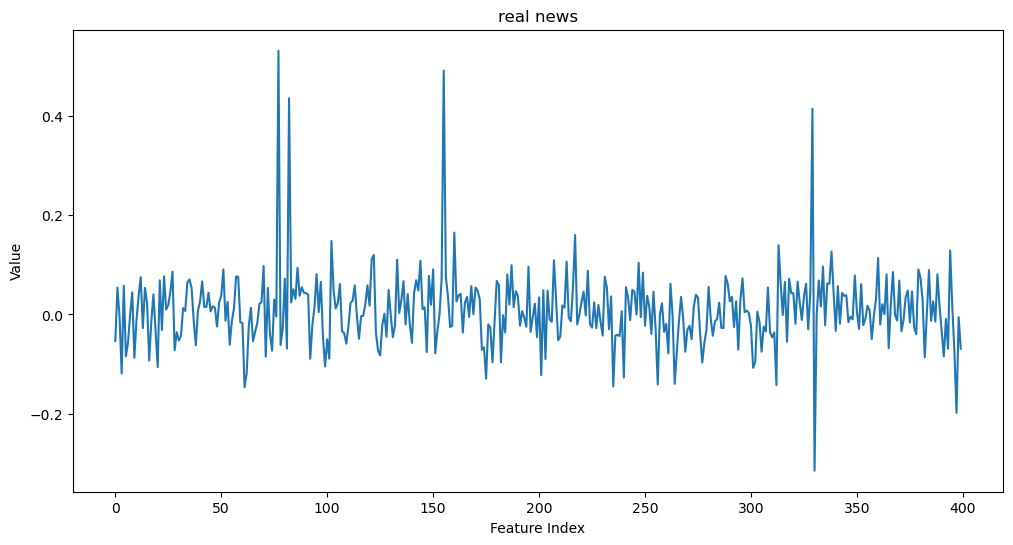

In [7]:
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(12, 6))
plt.plot(text_vector[:400].cpu().numpy())
plt.title("real news")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.show()

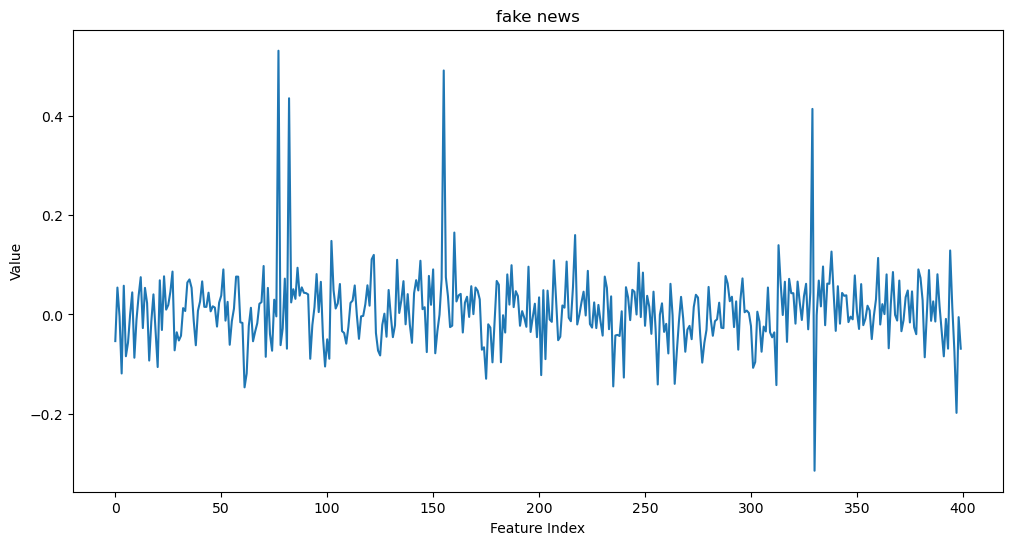

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(text_vector[:400].cpu().numpy())
plt.title("fake news")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [10]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [11]:
target=data.label

In [12]:
target.value_counts(normalize=True).rename({0:'fake',1:'real'})

label
real    0.514404
fake    0.485596
Name: proportion, dtype: float64

<Axes: ylabel='count'>

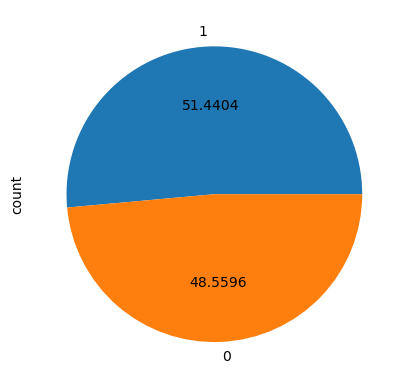

In [13]:
data['label'].value_counts().plot.pie(autopct='%.4f')

In [14]:
data=data.drop(columns=['Unnamed: 0'])

In [15]:
data = data.fillna('')
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [16]:
data["title_text"] = data["title"] + data["text"]
data["body_len"] = data["title_text"].apply(lambda x: len(x) - x.count(" "))

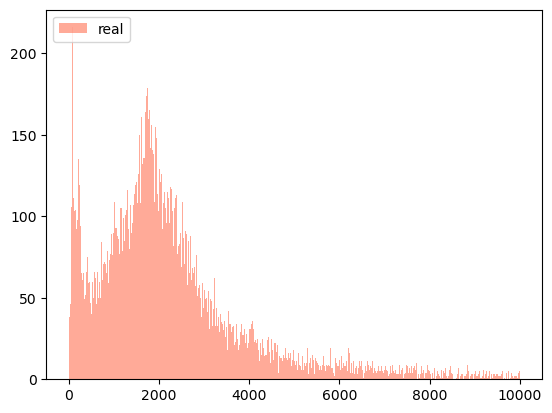

In [17]:
bins = np.linspace(0,10000,1000)

plt.hist(data[data["label"]== 1]["body_len"], bins, alpha=0.5, label="real", color="#FF5733")
plt.legend(loc="upper left")
plt.show()

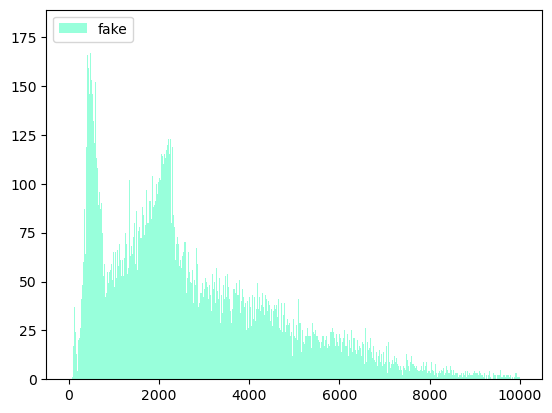

In [18]:
plt.hist(data[data["label"]== 0]["body_len"], bins, alpha=0.5, label="fake", color="#33FFB8")
plt.legend(loc="upper left")
plt.show()

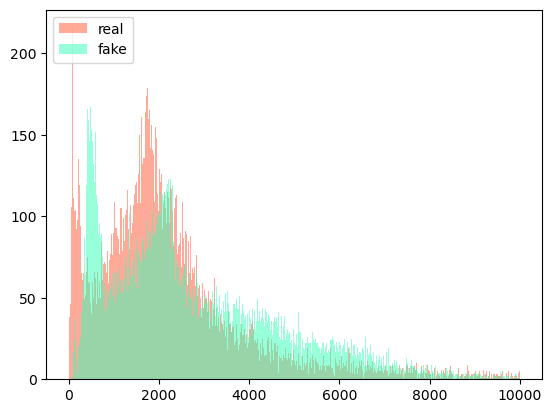

In [19]:
bins = np.linspace(0,10000,1000)

plt.hist(data[data["label"]== 1]["body_len"], bins, alpha=0.5, label="real", color="#FF5733")
plt.hist(data[data["label"]== 0]["body_len"], bins, alpha=0.5, label="fake", color="#33FFB8")
plt.legend(loc="upper left")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

Y=data['label']


x_train, x_test, y_train, y_test = train_test_split(data['text'], Y, test_size=0.2,shuffle=True)

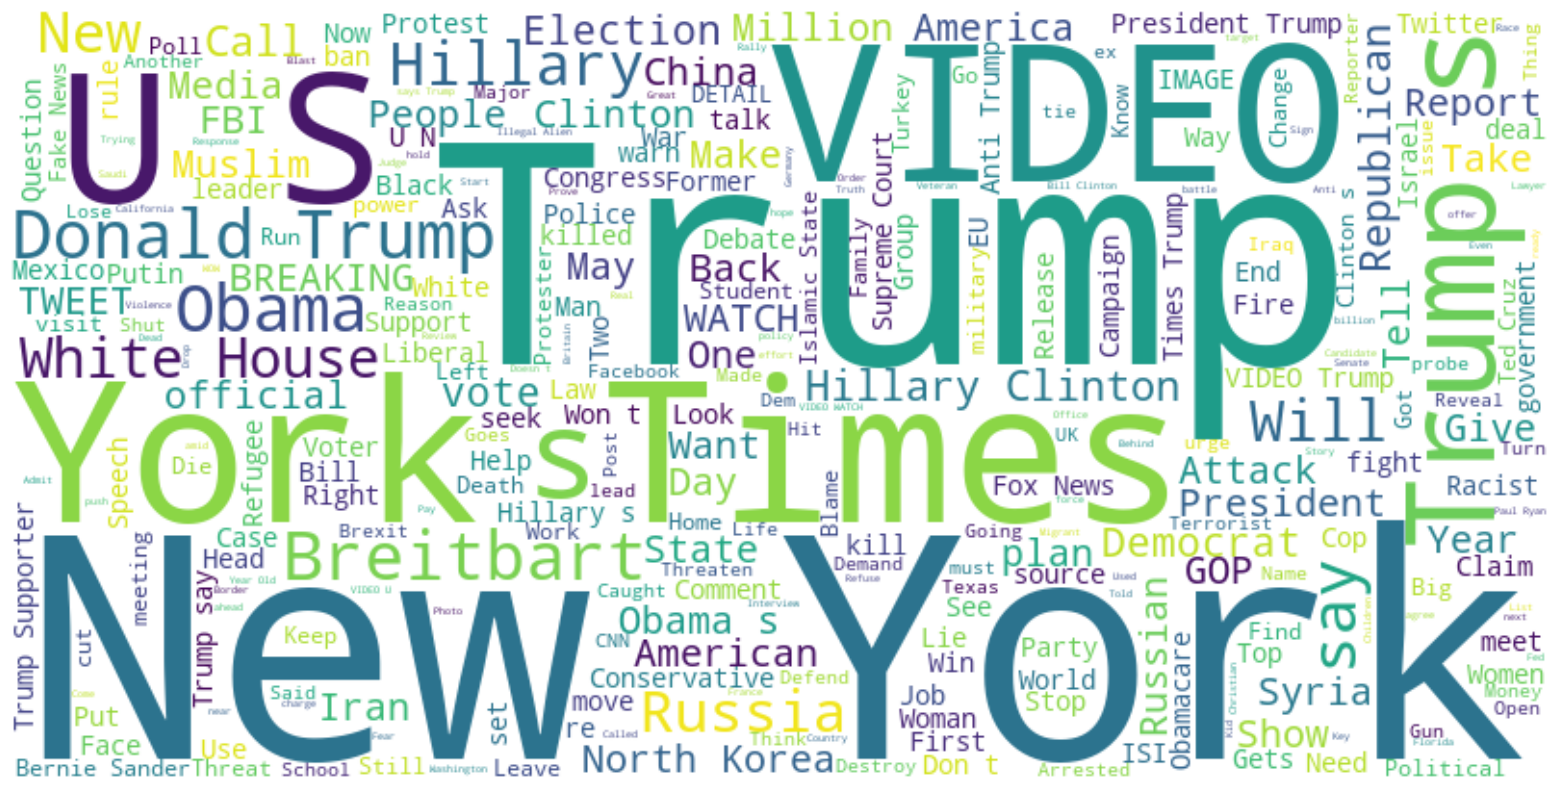

In [21]:
from wordcloud import WordCloud

titles = ' '.join(title for title in data['title'])
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

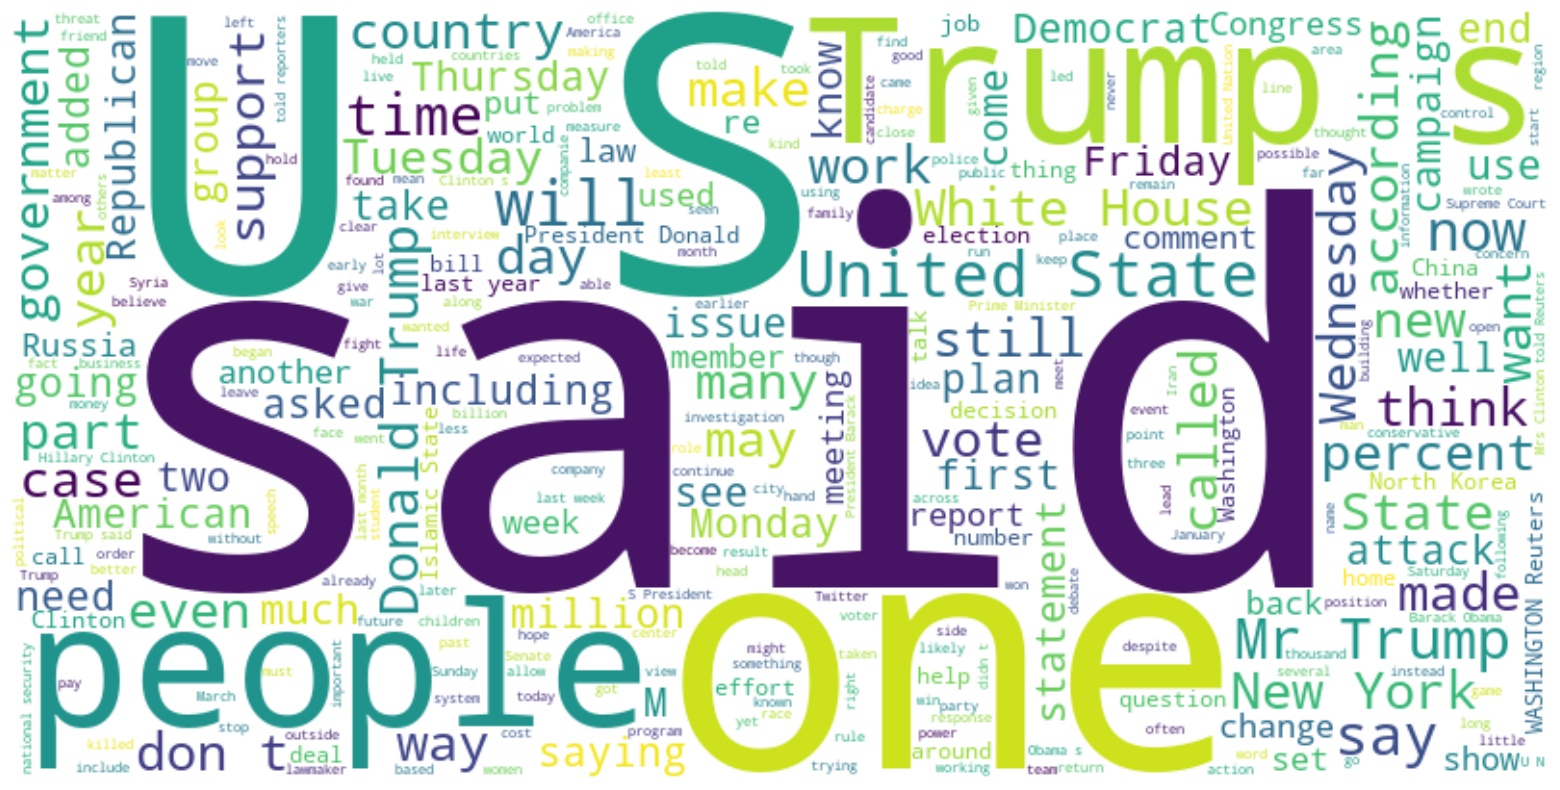

In [25]:
fake_news = x_train[y_train == 0]
real_news = x_train[y_train == 1]
fake_texts = ' '.join(text for text in fake_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

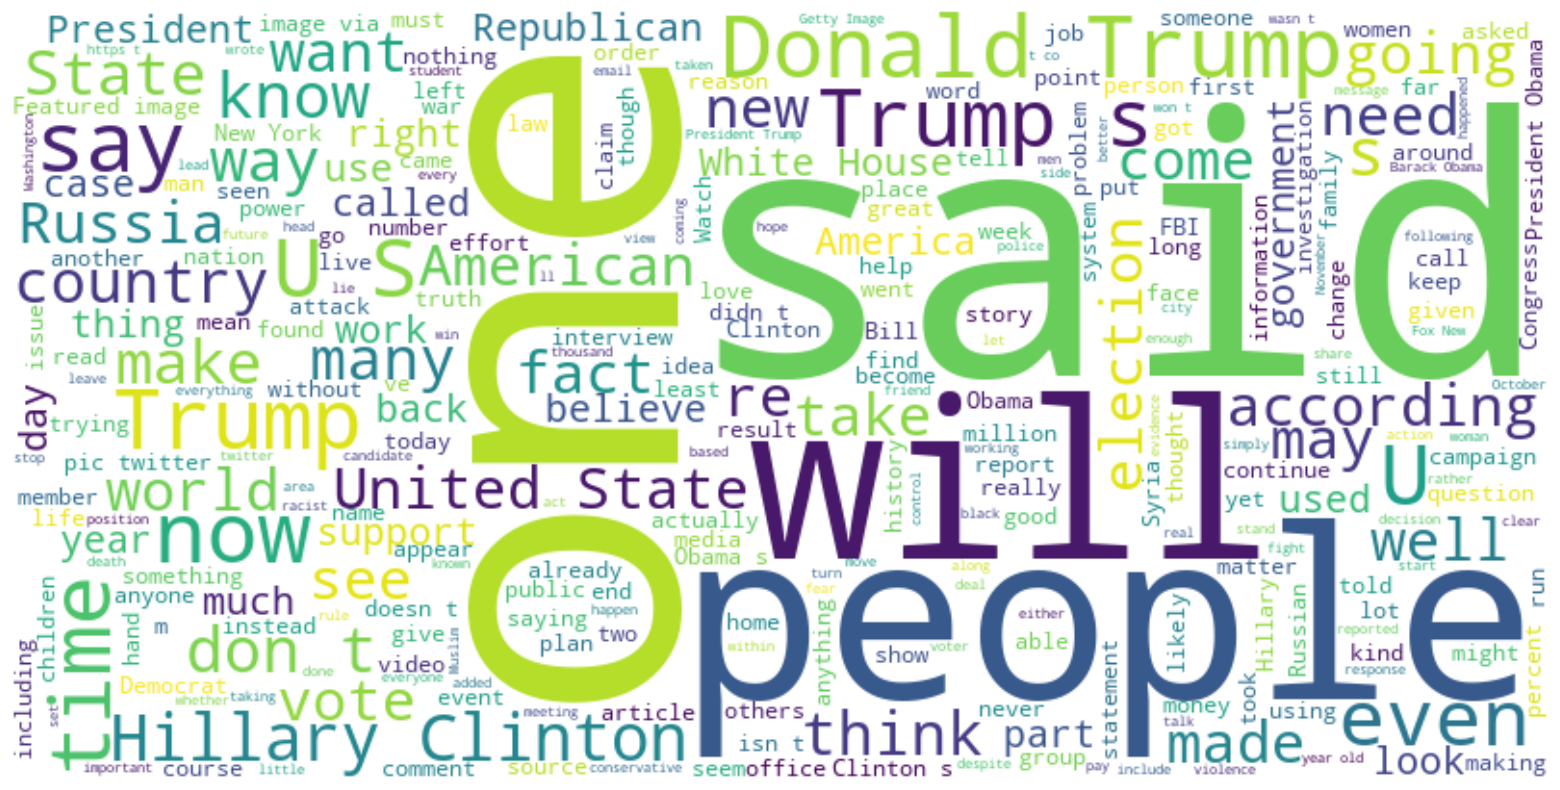

In [23]:
real_texts = ' '.join(text for text in real_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(real_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

In [24]:
fake_news

56431    (Reuters) - U.S. Republican presidential candi...
57374    WASHINGTON (Reuters) - U.S. President Donald T...
50804    (Reuters) - Former U.S. President George H.W. ...
60169    MOSCOW (Reuters) - The Kremlin said on Thursda...
65081    LONDON (Reuters) - North Korea s  reckless beh...
                               ...                        
64639    A Guatemalan national accused of raping a mino...
44607    Country artist Toby Keith will not back out of...
6191     WASHINGTON (Reuters) - Democratic presidential...
55683    WASHINGTON (Reuters) - Republican presidential...
53172    DUBAI (Reuters) - A Western-backed Saudi-led c...
Name: text, Length: 28017, dtype: object